In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv('E:\Data Science Projects\datasets\Births2015.csv')

In [74]:
df.head()

,Unnamed: 0,date,births,wday,year,month,day_of_year,day_of_month,day_of_week
0,1,2015-01-01,8068,Thu,2015,1,1,1,5
1,2,2015-01-02,10850,Fri,2015,1,2,2,6
2,3,2015-01-03,8328,Sat,2015,1,3,3,7
3,4,2015-01-04,7065,Sun,2015,1,4,4,1
4,5,2015-01-05,11892,Mon,2015,1,5,5,2


In [75]:
f_birth = df[['date','births']]

In [76]:
print(f_birth.shape)
f_birth.info()

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [77]:
f_birth.tail()

,date,births
360,2015-12-27,7518
361,2015-12-28,13100
362,2015-12-29,13458
363,2015-12-30,13100
364,2015-12-31,11608


In [78]:
f_birth.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


In [79]:
f_birth['date']=pd.to_datetime(f_birth['date'])
f_birth2=f_birth.set_index('date')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9028\2255692921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_birth['date']=pd.to_datetime(f_birth['date'])


In [80]:
f_birth2

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892
...,...
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458


<AxesSubplot:>

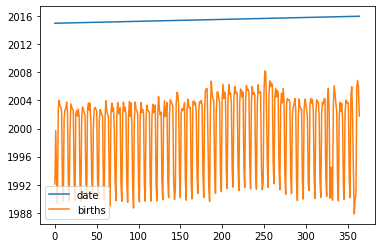

In [81]:
f_birth.plot()

Stationary Series

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9028\2911108881.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  f_birth_mean =f_birth.rolling(window =20).mean()


       births
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
..        ...
360  10371.55
361  10410.15
362  10490.20
363  10532.25
364  10542.35

[365 rows x 1 columns]


<AxesSubplot:>

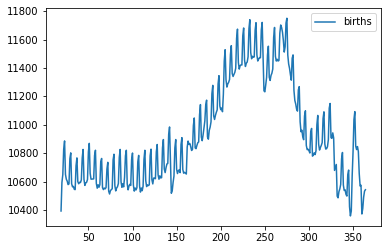

In [82]:
#MOVING AVG
f_birth_mean =f_birth.rolling(window =20).mean()
print(f_birth_mean)
f_birth_mean.plot()

Create a Base Line Model(SARIMA,MOVING AVG,)

In [83]:
series_val = f_birth2.values
series_val
print(type(series_val))

<class 'numpy.ndarray'>


In [84]:
val =pd.DataFrame(series_val)

In [85]:
val

,0
0,8068
1,10850
2,8328
3,7065
4,11892
...,...
360,7518
361,13100
362,13458
363,13100


In [86]:
birth = pd.concat([val,val.shift(1)],axis=1)
birth.head()

,0,0
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [87]:

birth.columns=['Actual','Predicted']
birth.head()



,Actual,Predicted
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [89]:
birth_test =birth[1:]
birth_test.isnull().sum()


Actual       0
Predicted    0
dtype: int64

In [90]:
birth_error1 = mean_absolute_error(birth_test['Actual'],birth_test['Predicted'])
birth_error2 =mean_squared_error(birth_test['Actual'],birth_test['Predicted'])

In [91]:
print((np.sqrt(birth_error1)),(np.sqrt(birth_error2)))

39.479164069220055 2272.092334594498


In [92]:
b_t = birth_test[1:360]

In [93]:
b_t

,Actual,Predicted
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0
5,12425,11892.0
6,12141,12425.0
...,...,...
356,11595,13131.0
357,8714,11595.0
358,6515,8714.0
359,7294,6515.0


In [94]:
b_t_error1 = mean_absolute_error(b_t['Actual'],b_t['Predicted'])
b_t_error2 =mean_squared_error(b_t['Actual'],b_t['Predicted'])

In [95]:
print((np.sqrt(b_t_error1)),(np.sqrt(b_t_error2)))

39.38100442788761 2262.528881916025


In [96]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [99]:
f_birth

,date,births
0,2015-01-01,8068
1,2015-01-02,10850
2,2015-01-03,8328
3,2015-01-04,7065
4,2015-01-05,11892
...,...,...
360,2015-12-27,7518
361,2015-12-28,13100
362,2015-12-29,13458
363,2015-12-30,13100


ValueError: x is required to have ndim 1 but has ndim 2

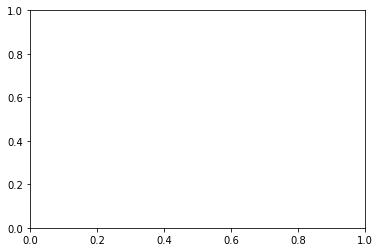

In [118]:
plot_pacf(birth)

In [104]:
f_birth.size

730

In [112]:
f_tr = f_birth[0:650]
f_te = f_birth[651:]

In [113]:
print(f_tr.size)

730


In [114]:
from statsmodels.tsa.arima_model import ARIMA

In [116]:
model = ARIMA(f_tr,order=(2,0,3))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [2]:
X = np.arange(0, 100, 1).reshape(-1, 1)
y = np.sin(X).ravel()

Mean Squared Error: 0.6088783632231181


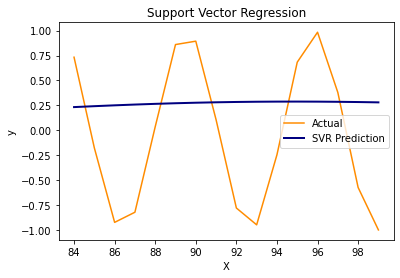

In [5]:
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Create an SVR model (you can tune hyperparameters here)
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(X_train, y_train)

# Predict using the model
y_pred = svr.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.plot(X_test, y_test, color='darkorange', label='Actual')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()







In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df =pd.read_csv('E:\Data Science Projects\datasets\Births2015.csv',usecols=['date','births'])

In [19]:
df.head()

,date,births
0,2015-01-01,8068
1,2015-01-02,10850
2,2015-01-03,8328
3,2015-01-04,7065
4,2015-01-05,11892


<AxesSubplot:>

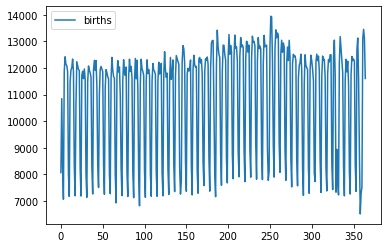

In [20]:
df.plot()

In [21]:
df.set_index('date',inplace=True)

<AxesSubplot:xlabel='date'>

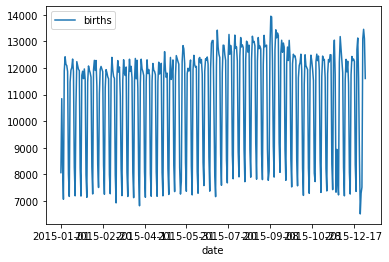

In [22]:
df.plot()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
df

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892
...,...
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458


In [30]:
df.columns

Index(['births'], dtype='object')

In [31]:
df.reset_index()

,date,births
0,2015-01-01,8068
1,2015-01-02,10850
2,2015-01-03,8328
3,2015-01-04,7065
4,2015-01-05,11892
...,...,...
360,2015-12-27,7518
361,2015-12-28,13100
362,2015-12-29,13458
363,2015-12-30,13100


In [33]:
result = seasonal_decompose(df['births'])
result.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

: 

In [2]:
!pip install darts

  Obtaining dependency information for darts from https://files.pythonhosted.org/packages/0b/29/3d09769040517fe39c2b16c3445a9d88d1290e88ba67a9a08a7071efafce/darts-0.26.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/48.4 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.4 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 48.4/48.4 kB 615.3 kB/s eta 0:00:00
  Using cached nfoursid-1.0.1-py3-none-any.whl (16 kB)
     ---------------------------------------- 0.0/569.7 kB ? eta -:--:--
     ----- --------------------------------- 81.9/569.7 kB 2.3 MB/s eta 0:00:01
     ---------- --------------------------- 163.8/569.7 kB 2.0 MB/s eta 0:00:01
     --------------- ---------------------- 225.3/569.7 kB 2.0 MB/s eta 0:00:01
     ---------------------- --------------- 337.9/569.7 kB 1.9 MB/s eta 0:00:01
     ----------------------------- -------- 440.3/569.7 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



    --------------------------------------- 1.5/99.7 MB 1.4 MB/s eta 0:01:11
    --------------------------------------- 1.5/99.7 MB 1.4 MB/s eta 0:01:11
    --------------------------------------- 1.6/99.7 MB 1.4 MB/s eta 0:01:11
    --------------------------------------- 1.6/99.7 MB 1.4 MB/s eta 0:01:12
    --------------------------------------- 1.7/99.7 MB 1.4 MB/s eta 0:01:13
    --------------------------------------- 1.7/99.7 MB 1.4 MB/s eta 0:01:13
    --------------------------------------- 1.8/99.7 MB 1.4 MB/s eta 0:01:11
    --------------------------------------- 1.9/99.7 MB 1.4 MB/s eta 0:01:12
    --------------------------------------- 2.0/99.7 MB 1.4 MB/s eta 0:01:11
    --------------------------------------- 2.0/99.7 MB 1.4 MB/s eta 0:01:12
    --------------------------------------- 2.1/99.7 MB 1.4 MB/s eta 0:01:12
    --------------------------------------- 2.2/99.7 MB 1.4 MB/s eta 0:01:11
    --------------------------------------- 2.2/99.7 MB 1.4 MB/s eta 0:01:11

In [5]:
import pandas  as pd
from darts import TimeSeries

ModuleNotFoundError: No module named 'darts'

In [18]:
def stair(n):
    for i in range(0,n):
        for j in range(0,i+1):
            print('#')
        print('\n')

In [19]:
if __name__ =='__main__':
    stair(6)

#


#
#


#
#
#


#
#
#
#


#
#
#
#
#


#
#
#
#
#
#




In [24]:
def pypart(n):
    k = 2*n - 2
    for i in range(0, n):
        for j in range(0,k):
            print('\n')
        k=k-2
        for j in range(0,i+1):
            print("#",end="")
        print("\r")
 
# Driver Code
n = 5
pypart(n)

















#












##








###




####
#####


In [31]:
def stair(n):
    k = k-1
    for i in range(0,n):
        for j in range(0,k):
            print(end='')
            k=k-1
        for j in range(0,i+1):
            print('#','\n')
        print('\r')
n=6
stair(n)      


UnboundLocalError: local variable 'k' referenced before assignment

In [3]:
import numpy as np
import pandas as pd

In [34]:
import pandas as pd

data ={'Category':['Electronics','Aparal'],
       'Product':['Phone','T-shirt'],
       'Sales':[100,50]}

df =pd.DataFrame(data)
df

,Category,Product,Sales
0,Electronics,Phone,100
1,Aparal,T-shirt,50


In [36]:
pivot = df.pivot_table(index='Category',values='Sales',aggfunc='sum')

In [37]:
pivot

,Sales
Category,
Aparal,50
Electronics,100


LSTM for time series prediction


In [2]:
import numpy as np
import pandas as pd

OSError: [Errno 22] Invalid argument: 'E:\\Data Science Projects\\datasets\x07apl.csv'